In [2]:
import numpy as np
import random
import pandas as pd
import os
import itertools
import matplotlib.pyplot as plt
import time

from tqdm import tqdm

os.getcwd()

'C:\\Users\\callu\\Dropbox\\SupervisedLearning\\Assignment2\\src'

# PART II

**(a) In this part, you will implement the four classification algorithms and then use them to estimate
the sample complexity of these algorithms. Here you will plot m (left axis) versus n (bottom axis). As an illustration I include an example plot of estimated sample complexity for least squares. Please include sample complexity plots for all four all four algorithms.**

### Generate data

In [3]:
### Generate m patterns x1, . . . ,xm sampled uniformly at random from {−1, 1}^n

def sample_data(m,n):
    data = np.zeros((m,n))
    for i in range(m):
        data[i,:] = np.random.choice([-1,1], n)
        
    return data, data[:,0]

In [4]:
### Generate m patterns x1, . . . ,xm sampled uniformly at random from {0, 1}^n

def sample_data_winnow(m,n):
    data = np.zeros((m,n))
    for i in range(m):
        data[i,:] = np.random.choice([0,1], n)
        
    return data, data[:,0]

In [69]:
def bound_constant(num_test_points, delta):
    return np.sqrt(np.log(1/delta)/(2*num_test_points))

## Perceptron algorithm

In [94]:
def perceptron(xs,ys):
    
    m,n = np.shape(xs)
    w = np.zeros(n)
    M = 0
    
    for t in range(m):
        x_ = xs[t,:]
        y_ = ys[t]
        y_hat = np.sign(np.dot(w,x_))
        
        if ((y_*y_hat) <= 0):
            w = w + y_*x_
            M += 1
            
    return w, M

In [95]:
# find average generalisation error

def find_mean_gen_error(m,n, number_of_runs, num_of_test_points):
    
    gen_error_for_each_run = np.zeros(number_of_runs)
    for r in range(number_of_runs):
        #print(r)
        trainxs, trainys = sample_data(m,n)
        testxs, testys = sample_data(num_of_test_points,n)
    
        w = perceptron(trainxs, trainys)[0]
        mistakes = 0
        
        for i in range(num_of_test_points):
            x_ = testxs[i,:]
            y_ = testys[i]
            y_pred = np.sign(np.dot(w,x_))
        
            if ((y_*y_pred) <= 0):
                mistakes += 1
            
        gen_error_for_each_run[r] = mistakes/num_of_test_points     #not 2^n because we are only using 1000 not every possible case
        
    return np.mean(gen_error_for_each_run)
               

In [109]:
def find_complexity(number_of_runs, num_of_test_points, range_n):
    
    complexity_for_each_n = np.zeros(np.size(range_n))
    count = 0
    delta = 0.2
    #print(bound_constant(num_of_test_points, delta))
    for n in (range_n):
        m = 1
        gen_error = find_mean_gen_error(m,n,number_of_runs,num_of_test_points)
        while (gen_error > 0.1):
            #print(test_error)
            m += 1
            gen_error = find_mean_gen_error(m,n,number_of_runs,num_of_test_points) #+ bound_constant(num_of_test_points, delta)
        complexity_for_each_n[count] = m
        count += 1
        
    return complexity_for_each_n

In [110]:
def find_average_complexity(n_runs, n_test):
    
    range_n = range(5, 101)
    complexity_list = np.zeros(shape=(n_runs, np.size(range_n)))
    
    for r in tqdm(range(n_runs)):
        f1 = find_complexity(8, n_test, range_n)
        complexity_list[r,:] = f1
        
    return np.mean(complexity_list, axis = 0), np.std(complexity_list, axis = 0)

In [111]:
f1 = find_average_complexity(20, 150)






  0%|          | 0/20 [00:00<?, ?it/s]




  5%|▌         | 1/20 [03:48<1:12:16, 228.25s/it]




 10%|█         | 2/20 [07:39<1:08:42, 229.01s/it]




 15%|█▌        | 3/20 [11:25<1:04:41, 228.33s/it]




 20%|██        | 4/20 [15:03<1:00:03, 225.19s/it]




 25%|██▌       | 5/20 [18:41<55:47, 223.14s/it]  




 30%|███       | 6/20 [22:19<51:40, 221.45s/it]




 35%|███▌      | 7/20 [25:50<47:19, 218.46s/it]




 40%|████      | 8/20 [29:36<44:06, 220.51s/it]




 45%|████▌     | 9/20 [33:17<40:26, 220.63s/it]




 50%|█████     | 10/20 [36:55<36:38, 219.88s/it]




 55%|█████▌    | 11/20 [40:37<33:04, 220.55s/it]




 60%|██████    | 12/20 [44:32<29:58, 224.80s/it]




 65%|██████▌   | 13/20 [48:24<26:29, 227.02s/it]




 70%|███████   | 14/20 [52:19<22:56, 229.35s/it]




 75%|███████▌  | 15/20 [56:11<19:11, 230.24s/it]




 80%|████████  | 16/20 [59:32<14:45, 221.47s/it]




 85%|████████▌ | 17/20 [1:02:59<10:51, 217.11s/it]




 90%|█████████ | 18/20 [1:06:17<07:02, 211.43s/i

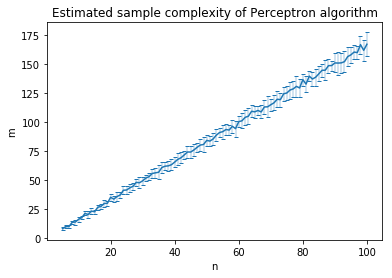

In [112]:
plt.errorbar(range(5, 101), f1[0], f1[1], elinewidth=0.4, ls = '-', capsize=2)
plt.xlabel('n')
plt.ylabel('m')
plt.title('Estimated sample complexity of Perceptron algorithm')
plt.show()

## Winnow algorithm 

In [4]:
def winnow(xs,ys):
    
    m,n = np.shape(xs)
    w = np.ones(n)
    
    for t in range(m):
        x_ = xs[t,:]
        y_ = ys[t]
        if (np.dot(w,x_) < n):
            y_hat = 0
        else:
            y_hat = 1
        
        if (y_ != y_hat):
            w = w*2**((y_-y_hat)*x_)
            
    return w

In [5]:
# find average generalisation error

def find_mean_gen_error_winnow(m,n, number_of_runs, num_of_test_points):
    
    gen_error_for_each_run = np.zeros(number_of_runs)
    for r in range(number_of_runs):
        trainxs, trainys = sample_data_winnow(m,n)
        testxs, testys = sample_data_winnow(num_of_test_points,n)
    
        w = winnow(trainxs, trainys)
        mistakes = 0
        
        for i in range(num_of_test_points):
            x_ = testxs[i,:]
            y_ = testys[i]
            
            if (np.dot(w,x_) < n):
                y_pred = 0
            else:
                y_pred = 1
        
            if (y_ != y_pred):
                mistakes += 1
            
        gen_error_for_each_run[r] = mistakes/num_of_test_points       #not 2^n because we are only using a subset not every possible case
        #print(gen_error_for_each_run[r])
        
    return 100*np.mean(gen_error_for_each_run)
               

In [6]:
def find_complexity_winnow(number_of_runs,num_of_test_points, range_n):
    
    complexity_for_each_n = np.zeros(np.size(range_n))
    count = 0
    delta = 0.1
    for n in range_n:
        m = 1
        gen_error = find_mean_gen_error_winnow(m,n,number_of_runs,num_of_test_points)
        
        while (gen_error > 10):
            m += 1
            gen_error = find_mean_gen_error_winnow(m,n,number_of_runs,num_of_test_points) #+ bound_constant(num_of_test_points, delta)
            
        complexity_for_each_n[count] = m
        count += 1
        
    return complexity_for_each_n

In [12]:
def find_average_complexity_winnow(n_runs, n_test):
    
    range_n = range(5, 101)
    complexity_list = np.zeros(shape=(n_runs, np.size(range_n)))
    
    for r in tqdm(range(n_runs)):
        f = find_complexity_winnow(8, n_test, range_n)
        complexity_list[r,:] = f
        
    return np.mean(complexity_list, axis = 0), np.std(complexity_list, axis = 0)

In [13]:
f2 = find_average_complexity_winnow(20,150)




  0%|          | 0/20 [00:00<?, ?it/s]


  5%|▌         | 1/20 [00:59<18:41, 59.02s/it]


 10%|█         | 2/20 [01:58<17:45, 59.17s/it]


 15%|█▌        | 3/20 [03:04<17:21, 61.25s/it]


 20%|██        | 4/20 [04:05<16:19, 61.20s/it]


 25%|██▌       | 5/20 [05:12<15:44, 62.96s/it]


 30%|███       | 6/20 [06:13<14:33, 62.36s/it]


 35%|███▌      | 7/20 [07:13<13:18, 61.44s/it]


 40%|████      | 8/20 [08:17<12:28, 62.40s/it]


 45%|████▌     | 9/20 [09:26<11:47, 64.35s/it]


 50%|█████     | 10/20 [10:35<10:56, 65.64s/it]


 55%|█████▌    | 11/20 [11:50<10:16, 68.52s/it]


 60%|██████    | 12/20 [12:48<08:43, 65.43s/it]


 65%|██████▌   | 13/20 [13:49<07:27, 63.94s/it]


 70%|███████   | 14/20 [14:48<06:15, 62.55s/it]


 75%|███████▌  | 15/20 [15:54<05:18, 63.62s/it]


 80%|████████  | 16/20 [16:54<04:09, 62.43s/it]


 85%|████████▌ | 17/20 [17:54<03:05, 61.75s/it]


 90%|█████████ | 18/20 [18:55<02:03, 61.61s/it]


 95%|█████████▌| 19/20 [20:03<01:03, 63.57s/it]


100%|██████████

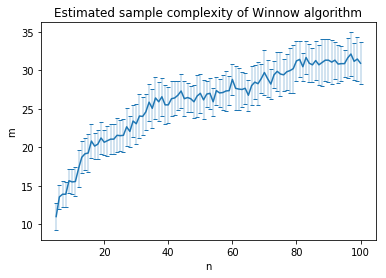

In [14]:
plt.errorbar(range(5, 101), f2[0], f2[1], elinewidth=0.4, ls = '-', capsize=2)
plt.xlabel('n')
plt.ylabel('m')
plt.title('Estimated sample complexity of Winnow algorithm')
plt.show()

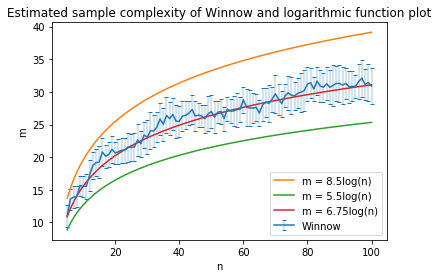

In [29]:
x = [i for i in range(5,101,1)]
y = [8.5*np.log(i) for i in range(5,101,1)]
z = [5.5*np.log(i) for i in range(5,101,1)]
w = [6.75*np.log(i) for i in range(5,101,1)]

plt.errorbar(range(5, 101), f2[0], f2[1], elinewidth=0.4, ls = '-', capsize=2, label='Winnow')
plt.plot(x,y,label='m = 8.5log(n)')
plt.plot(x,z,label='m = 5.5log(n)')
plt.plot(x,w,label='m = 6.75log(n)')
plt.legend()
plt.xlabel('n')
plt.ylabel('m')
plt.title('Estimated sample complexity of Winnow and logarithmic function plot')
plt.show()

## Least squares 

In [48]:
# find average generalisation error

def find_mean_gen_error_ls(m,n,number_of_runs,num_of_test_points):
    
    gen_error_for_each_run = np.zeros(number_of_runs)
    for r in range(number_of_runs):
        trainxs, trainys = sample_data(m,n)
        testxs, testys = sample_data(num_of_test_points,n)
    
        w = np.linalg.pinv(trainxs) @ trainys        # regression vector
        mistakes = 0
        
        for i in range(num_of_test_points):
            x_ = testxs[i,:]
            y_ = testys[i]
            
            y_pred = np.sign(np.dot(w,x_))

            if ((y_*y_pred) <= 0):
                mistakes += 1
            
        gen_error_for_each_run[r] = mistakes/num_of_test_points     #not 2^n because we are only using a subset not every possible case
        
    return 100*np.mean(gen_error_for_each_run)

In [53]:
def find_complexity_ls(number_of_runs,num_of_test_points, range_n):

    complexity_for_each_n = np.zeros(np.size(range_n))
    count = 0
    delta = 0.1
    for n in (range_n):
        m = 1
        gen_error = find_mean_gen_error_ls(m,n,number_of_runs,num_of_test_points)
        
        while (gen_error > 10):
            m += 1
            gen_error = find_mean_gen_error_ls(m,n,number_of_runs,num_of_test_points) #+ bound_constant(num_of_test_points, delta)
            
        complexity_for_each_n[count] = m
        count += 1
        
    return complexity_for_each_n

In [91]:
def find_average_complexity_ls(n_runs, n_test):
    
    range_n = range(5, 101)
    complexity_list = np.zeros(shape=(n_runs, np.size(range_n)))
    
    for r in tqdm(range(n_runs)):
        f3 = find_complexity_ls(4, n_test, range_n)
        complexity_list[r,:] = f3
        
    return np.mean(complexity_list, axis = 0), np.std(complexity_list, axis = 0)

In [92]:
f3 = find_average_complexity_ls(20,80)





  0%|          | 0/20 [00:00<?, ?it/s]



  5%|▌         | 1/20 [00:52<16:43, 52.79s/it]



 10%|█         | 2/20 [01:54<16:36, 55.34s/it]



 15%|█▌        | 3/20 [02:47<15:29, 54.67s/it]



 20%|██        | 4/20 [03:40<14:28, 54.28s/it]



 25%|██▌       | 5/20 [04:32<13:22, 53.48s/it]



 30%|███       | 6/20 [05:25<12:27, 53.36s/it]



 35%|███▌      | 7/20 [06:18<11:32, 53.29s/it]



 40%|████      | 8/20 [07:14<10:48, 54.08s/it]



 45%|████▌     | 9/20 [08:10<10:00, 54.63s/it]



 50%|█████     | 10/20 [09:05<09:07, 54.79s/it]



 55%|█████▌    | 11/20 [09:59<08:11, 54.61s/it]



 60%|██████    | 12/20 [10:59<07:29, 56.24s/it]



 65%|██████▌   | 13/20 [11:59<06:41, 57.34s/it]



 70%|███████   | 14/20 [12:55<05:42, 57.05s/it]



 75%|███████▌  | 15/20 [13:51<04:42, 56.51s/it]



 80%|████████  | 16/20 [14:46<03:45, 56.27s/it]



 85%|████████▌ | 17/20 [15:42<02:48, 56.18s/it]



 90%|█████████ | 18/20 [16:37<01:51, 55.73s/it]



 95%|█████████▌| 19/20 [17:33<00:55, 55.68s/i

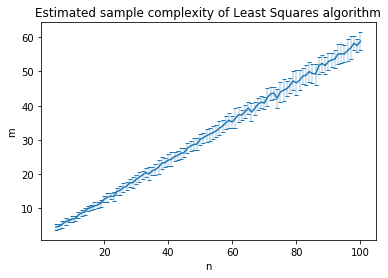

In [93]:
plt.errorbar(range(5, 101), f3[0], f3[1], elinewidth=0.4, ls = '-', capsize=2)
plt.xlabel('n')
plt.ylabel('m')
plt.title('Estimated sample complexity of Least Squares algorithm')
plt.show()

## 1-nearest neighbours 

In [4]:
from sklearn.metrics.pairwise import euclidean_distances

In [5]:
# find average generalisation error

def find_mean_gen_error_oneNN(m,n,number_of_runs,num_of_test_points):
    
    gen_error_for_each_run = np.zeros(number_of_runs)
    for r in range(number_of_runs):
        trainxs, trainys = sample_data(m,n)
        testxs, testys = sample_data(num_of_test_points,n)
    
        mistakes = 0
        #print('------- Run {} -------'.format(r+1)) 
        
        for i in range(num_of_test_points):
            x_ = testxs[i,:]
            y_ = testys[i]
            
            distances = np.zeros(m)
            #distances = euclidean_distances(x_.reshape(1,-1),trainxs)
           
            for j in range(m):
                distances[j] = np.linalg.norm(x_- trainxs[j,:], ord=1)
                #distances[j] = euclidean_distance(x_,trainxs[j,:])
            
            #print(distances)
                
            y_pred = trainys[np.argmin(distances)]       # nearest neighbour

            if ((y_*y_pred) <= 0):
                mistakes += 1
            
        gen_error_for_each_run[r] = mistakes/num_of_test_points     #not 2^n because we are only using a subset not every possible case
        
    return np.mean(gen_error_for_each_run)

In [7]:
def find_complexity_oneNN(number_of_runs,num_of_test_points, range_n):
    
    complexity_for_each_n = np.zeros(np.size(range_n))
    count = 0
    m_list = []
    m = 2
    for n in tqdm(range_n):
        m = 3*m//4
        gen_error = find_mean_gen_error_oneNN(m,n,number_of_runs,num_of_test_points)

        while (gen_error > 0.1):
            m += 1
            gen_error = find_mean_gen_error_oneNN(m,n,number_of_runs,num_of_test_points)
            
        complexity_for_each_n[count] = m

        m_list.append(m)
        plt.scatter(range_n[0:len(m_list)],m_list)
        plt.xlabel('n')
        plt.ylabel('m')
        plt.title('Estimated sample complexity of 1 Nearest Neighbours')
        plt.show()
        
        count += 1
        
    return complexity_for_each_n
    
def find_average_complexity_oneNN(n_runs, n_test):
    
    range_n = range(5, 50)
    complexity_list = np.zeros(shape=(n_runs, np.size(range_n)))
    
    for r in tqdm(range(n_runs)):
        f2 = find_complexity_oneNN(5, n_test, range_n)
        complexity_list[r,:] = f2
        
    return np.mean(complexity_list, axis = 0), np.std(complexity_list, axis = 0)
    


In [ ]:
f4 = find_average_complexity_oneNN(8,50)

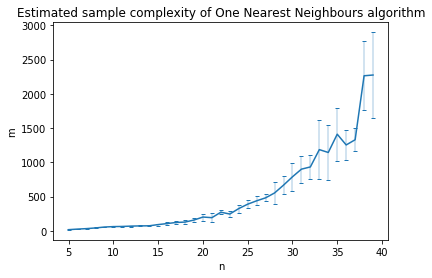

In [38]:
plt.errorbar(range(5, 50), f4[0], f4[1], elinewidth=0.4, ls = '-', capsize=2)
plt.xlabel('n')
plt.ylabel('m')
plt.title('Estimated sample complexity of One Nearest Neighbours algorithm')
plt.show()

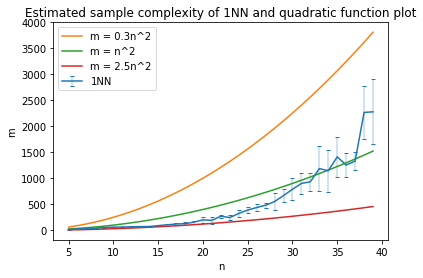

In [59]:
x = [i for i in range(5,40,1)]
y = [2.5*(i**2) for i in range(5,40,1)]
z = [1*(i**2) for i in range(5,40,1)]
w = [0.3*(i**2) for i in range(5,40,1)]

plt.errorbar(range(5, 40), f4[0], f4[1], elinewidth=0.4, ls = '-', capsize=2, label='1NN')
plt.plot(x,y,label='m = 0.3n^2')
plt.plot(x,z,label='m = n^2')
plt.plot(x,w,label='m = 2.5n^2')
plt.legend()
plt.xlabel('n')
plt.ylabel('m')
plt.title('Estimated sample complexity of 1NN and quadratic function plot')
plt.show()